In [1]:
from bs4 import BeautifulSoup
import requests
import time
import random
import pandas as pd

In [5]:
url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90")
html = BeautifulSoup(url.text)

current = int(html.find("span", class_ = "f_red").text[:-1])

In [11]:
def make_number(html):
    number = html.find("div", class_ = "lottonum").text.split()
    del number[-2]
    number = list(map(int, number))
    return number

In [24]:
from tqdm import tqdm
import pickle

for n in tqdm(range(len(total)+1, current + 1)):
    
    url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={n}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
    html = BeautifulSoup(url.text)
    
    number = make_number(html)
    total.append(number)
    
    f = open("lotto.dat", 'wb')
    pickle.dump(total, f)
    f.close()
    
    time.sleep(random.random() + 1)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]


In [22]:
lotto = pd.read_excel("result_fin.xlsx")
del lotto['Unnamed: 0']

total = []
for i in range(len(lotto)):
    
    a = list(lotto.iloc[i])
    total.append(a)

In [25]:
len(total)

1108

In [31]:
dic = {}

for i in total:
    for j in i:
        if j not in dic:
            dic[j] = 1
        else:
            dic[j] += 1
            
result = pd.DataFrame({"번호" : dic.keys(), "빈도수" : dic.values()})
result.sort_values("빈도수")

,번호,빈도수
7,9,140
36,22,147
21,41,153
1,23,153
10,25,155
2,29,155
44,28,156
11,32,158
26,8,161
43,5,162


In [43]:
box = []

for n in range(1, 46):
    count = 0
    for i in total[::-1]:
        if n in i:
            break
        else:
            count += 1
            
    box.append(count)

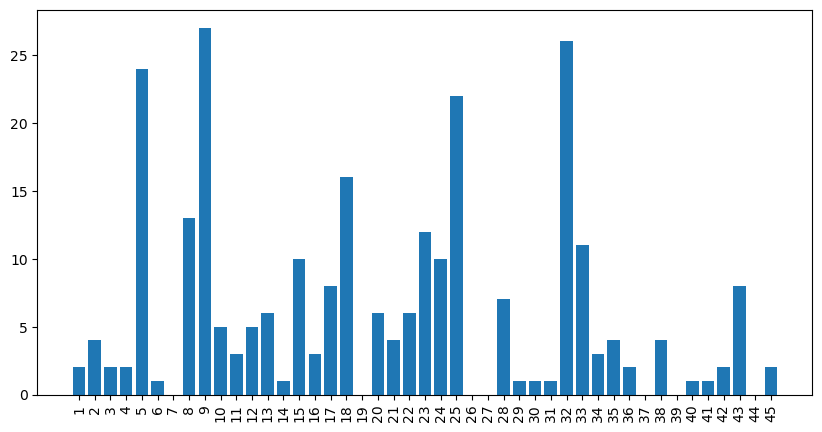

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.bar(range(1,46), box)
plt.xticks(range(1,46), rotation = 90)
plt.show()

In [49]:
box = []

for n1 in range(1, 46):
    for n2 in range(n1+1, 46):
        for n3 in range(n2+1, 46):
            count = 0
            for i in total:
                if n1 in i[:6] and n2 in i[:6] and n3 in i[:6]:
                    break
                else:
                    count += 1
            
            if count == len(total):
                box.append([n1,n2,n3])

In [50]:
len(box)

2896

In [53]:
for n1 in range(1, 46):
    for n2 in range(n1+1, 46):
        for n3 in range(n2+1, 46):
            print(n1, n2, n3)

1 2 3
1 2 4
1 2 5
1 2 6
1 2 7
1 2 8
1 2 9
1 2 10
1 2 11
1 2 12
1 2 13
1 2 14
1 2 15
1 2 16
1 2 17
1 2 18
1 2 19
1 2 20
1 2 21
1 2 22
1 2 23
1 2 24
1 2 25
1 2 26
1 2 27
1 2 28
1 2 29
1 2 30
1 2 31
1 2 32
1 2 33
1 2 34
1 2 35
1 2 36
1 2 37
1 2 38
1 2 39
1 2 40
1 2 41
1 2 42
1 2 43
1 2 44
1 2 45
1 3 4
1 3 5
1 3 6
1 3 7
1 3 8
1 3 9
1 3 10
1 3 11
1 3 12
1 3 13
1 3 14
1 3 15
1 3 16
1 3 17
1 3 18
1 3 19
1 3 20
1 3 21
1 3 22
1 3 23
1 3 24
1 3 25
1 3 26
1 3 27
1 3 28
1 3 29
1 3 30
1 3 31
1 3 32
1 3 33
1 3 34
1 3 35
1 3 36
1 3 37
1 3 38
1 3 39
1 3 40
1 3 41
1 3 42
1 3 43
1 3 44
1 3 45
1 4 5
1 4 6
1 4 7
1 4 8
1 4 9
1 4 10
1 4 11
1 4 12
1 4 13
1 4 14
1 4 15
1 4 16
1 4 17
1 4 18
1 4 19
1 4 20
1 4 21
1 4 22
1 4 23
1 4 24
1 4 25
1 4 26
1 4 27
1 4 28
1 4 29
1 4 30
1 4 31
1 4 32
1 4 33
1 4 34
1 4 35
1 4 36
1 4 37
1 4 38
1 4 39
1 4 40
1 4 41
1 4 42
1 4 43
1 4 44
1 4 45
1 5 6
1 5 7
1 5 8
1 5 9
1 5 10
1 5 11
1 5 12
1 5 13
1 5 14
1 5 15
1 5 16
1 5 17
1 5 18
1 5 19
1 5 20
1 5 21
1 5 22
1 5 23
1 5 24
1 5 25
